In [1]:
#importing necessory libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"S:\PROJECTS (O)\Laptop Price Predictor\laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
# Getting information about the dataset like column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Checking for duplicated rows in the dataset
df.duplicated().sum()

0

In [9]:
# Dropping the 'Unnamed: 0' column as it seems to be an unnecessary index column
df.drop(columns = ['Unnamed: 0'],inplace = True,axis = 1)

In [10]:
# Displaying the first few rows of the dataset after dropping the column
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [11]:
# Removing 'GB' from the 'Ram' column and converting it to integer type
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [12]:
# Removing 'kg' from the 'Weight' column and converting it to float type
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype(float)

In [13]:
# Displaying the first few rows of the dataset after converting 'Ram' and 'Weight' columns
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<AxesSubplot:>

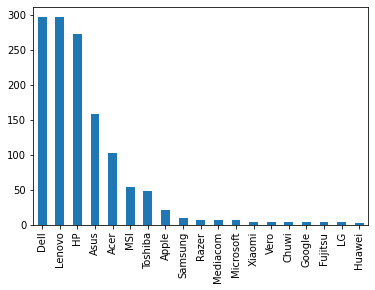

In [14]:
# Plotting a bar plot for the 'Company' column
df.Company.value_counts().plot(kind ='bar')

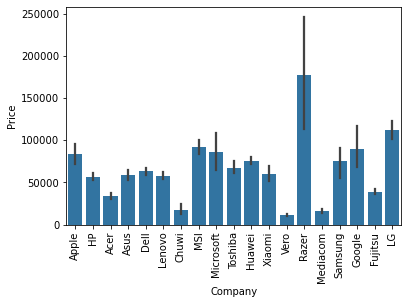

In [15]:
# Calculating the mean price for each company and plotting it
df.groupby('Company').agg({"Price": "mean"}).sort_values(by='Price', ascending=False).head(5)
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


<AxesSubplot:>

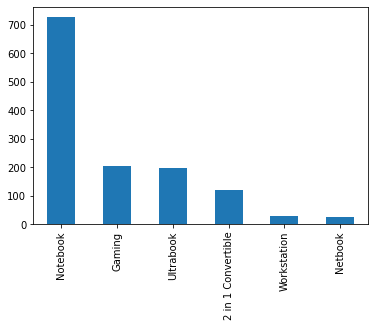

In [16]:
# Plotting a bar plot for the 'TypeName' column
df['TypeName'].value_counts().plot(kind ='bar')

In [17]:
# Calculating the mean price for each laptop type 
df.groupby('TypeName').agg({"Price":"mean"}).sort_values(by='Price',ascending=False)

,Price
TypeName,
Workstation,121497.525683
Gaming,92247.960187
Ultrabook,82489.713429
2 in 1 Convertible,68326.360066
Notebook,41669.149113
Netbook,33898.440960


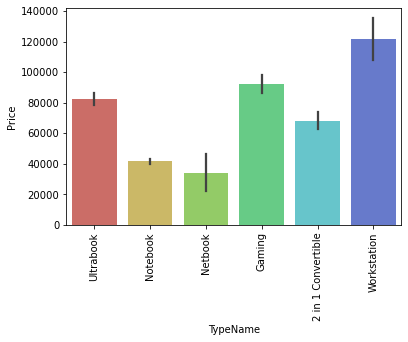

In [18]:
#plotting the mean price for each laptop type
sns.barplot(x=df['TypeName'],y = df['Price'],palette=sns.color_palette("hls", 8))
plt.xticks(rotation = 'vertical')
plt.show()

In [19]:
# Counting the occurrences of each unique value in the 'ScreenResolution' column,
# which represents the resolution of the laptop screens
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
# Creating a new binary feature 'Touchscreen' based on whether the 'ScreenResolution'
# contains the term 'Touchscreen'. If 'Touchscreen' is present in the screen resolution,
# it assigns 1 to indicate the presence of touchscreen, otherwise 0.
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

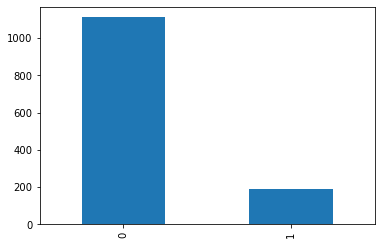

In [21]:
#checking the distribution of touchscreen and non-touchscreen 
df.Touchscreen.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

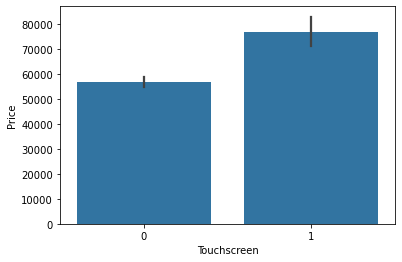

In [22]:
# Creating a bar plot to visualize the relationship between the 'Touchscreen' feature and the average price of laptops.
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [23]:
# Creating a new binary feature 'Ips' based on whether the 'ScreenResolution'
# contains the term 'IPS'. If 'IPS' is present in the screen resolution,
# it assigns 1 to indicate the presence of an IPS display, otherwise 0.
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot:>

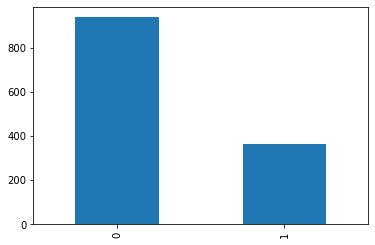

In [24]:
#checking the distribution of Ips and non-Ips 
df.Ips.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

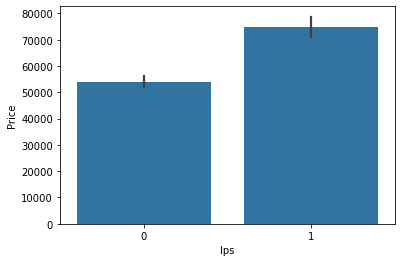

In [25]:
# Creating a bar plot to visualize the relationship between the 'Ips' feature and the average price of laptops.
sns.barplot(x=df['Ips'],y=df['Price'])

In [26]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


In [27]:
# Splitting the 'ScreenResolution' column by the 'x' delimiter, only splitting once,and expanding the result into separate columns.
df.ScreenResolution.str.split('x',n=1,expand = True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [28]:
# Defining a regular expression pattern to extract screen resolutions consisting of 
# 3 or 4 digits for both horizontal and vertical resolutions separated by 'x'.
resolution_pattern = r'(\d{3,4}x\d{3,4})'

# Extracting screen resolutions from the 'ScreenResolution' column using the defined pattern.
resolution = df['ScreenResolution'].str.extract(resolution_pattern)

# Displaying the extracted screen resolutions.
resolution


,0
0,2560x1600
1,1440x900
2,1920x1080
3,2880x1800
4,2560x1600
...,...
1298,1920x1080
1299,3200x1800
1300,1366x768
1301,1366x768


In [29]:
# Splitting the first column of the 'resolution' DataFrame by the 'x' delimiter and expanding it into
# separate columns 'X_res' and 'Y_res'. This separates the horizontal and vertical
# resolutions into individual columns.
df[['X_res', 'Y_res']] = resolution[0].str.split('x', expand=True)


In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
# Converting the 'X_res' and 'Y_res' columns from string type to integer type,
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [32]:
# Calculating the correlation matrix to measure the linear relationship
# between numerical features in the DataFrame.
df.corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


In [33]:
# Calculating the pixel density (pixels per inch - ppi) of the laptop screens
# using the (sqrt(X_res^2 + Y_res^2)) divided by the screen size (Inches).
df['ppi'] = np.sqrt((df['X_res'] ** 2) + (df['Y_res'] ** 2)) / df['Inches']

In [34]:
# Calculating the correlation coefficients between the 'Price' column (target variable)
# and all other numerical features in the DataFrame.
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [35]:
# Dropping columns 'ScreenResolution', 'X_res', 'Y_res', and 'Inches'
# from the DataFrame as they are no longer needed after extracting
# the pixel density ('ppi') feature.
df.drop(columns=['ScreenResolution', 'X_res', 'Y_res', 'Inches'], axis=1, inplace=True)

In [36]:
# Displaying the first few rows of the DataFrame after dropping the specified columns.
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [37]:
# Counting the occurrences of each unique value in the 'Cpu' column,
# which represents the processor (Central Processing Unit) of the laptops.
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [38]:
# Extracting the first three words from each entry in the 'Cpu' column
# and concatenating them to create a new feature 'Cpu Name'.
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [39]:
# Displaying the first few rows of the DataFrame after addition of new feature
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [40]:
# Defining a function to categorize processor names based on certain conditions.
def processor(cpu_name):
    if cpu_name in ("Intel Core i3", "Intel Core i5", "Intel Core i7"):
        return cpu_name
    elif cpu_name.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [41]:
# Applying the 'processor' function to categorize processor names
# and create a new feature 'Cpu Brand' based on the 'Cpu Name' column.
df['Cpu Brand'] = df['Cpu Name'].apply(lambda x: processor(x))

<AxesSubplot:>

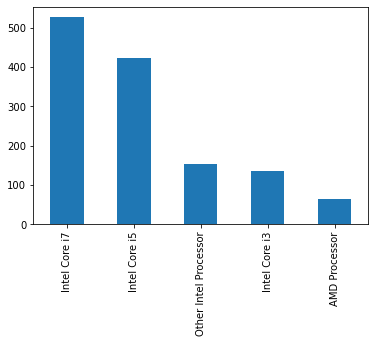

In [42]:
# Creating a bar plot to visualize the distribution of laptop brands based on the 'Cpu Brand' feature.
df['Cpu Brand'].value_counts().plot(kind='bar')

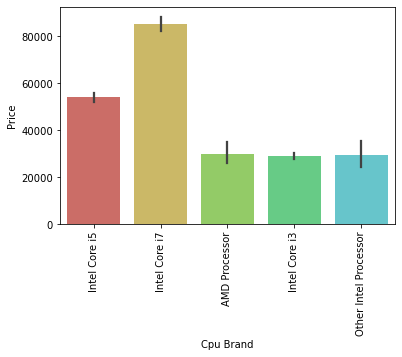

In [43]:
# Creating a bar plot to visualize the relationship between the 'Cpu Brand' feature and the price of laptops,
sns.barplot(x=df['Cpu Brand'],y =df['Price'],palette=sns.color_palette("hls", 8))
plt.xticks(rotation ='vertical')
plt.show()

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [45]:
# Dropping the 'Cpu' and 'Cpu Name' columns from the DataFrame
# as they are no longer needed after creating the 'Cpu Brand' feature.
df.drop(columns=['Cpu', 'Cpu Name'], axis=1, inplace=True)

In [46]:
# Displaying a random sample of 5 rows from the DataFrame to check the changes.
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
455,Dell,2 in 1 Convertible,4,500GB HDD,Intel HD Graphics 405,Windows 10,1.47,25521.1200,1,0,135.094211,Other Intel Processor
720,Lenovo,Ultrabook,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7
271,Asus,Gaming,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,82530.7200,0,0,127.335675,AMD Processor
353,HP,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.60,92615.0256,0,0,141.211998,Intel Core i7
1143,HP,Workstation,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.1200,0,1,141.211998,Intel Core i7


In [47]:
# Counting the occurrences of each unique value in the 'Ram' column,
# which represents the amount of RAM (Random Access Memory) in the laptops.
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

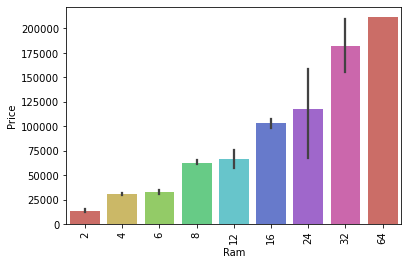

In [48]:
# Creating a bar plot to visualize the relationship between the RAM and the price of laptops,
sns.barplot(x=df['Ram'],y =df['Price'],palette=sns.color_palette("hls", 8))
plt.xticks(rotation ='vertical')
plt.show()

In [49]:
# Converting the 'Memory' column to string type, replacing '.0' with an empty string,
# removing 'GB' and replacing 'TB' with '000' to standardize the memory units.
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Splitting the 'Memory' column into two parts based on the '+' delimiter.
new = df["Memory"].str.split("+", n=1, expand=True)

# Extracting the first part of memory configuration and creating binary indicators
# for the presence of different storage types (HDD, SSD, Hybrid, Flash Storage).
df["first"] = new[0]
df["first"] = df["first"].str.strip()

df["second"] = new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

# Filling missing values in the 'second' column with '0'.
df["second"].fillna("0", inplace=True)

# Extracting numerical values from the 'second' column and creating binary indicators
# for the presence of different storage types (HDD, SSD, Hybrid, Flash Storage).
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

# Converting 'first' and 'second' columns to integer type.
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculating total storage capacity for each type (HDD, SSD, Hybrid, Flash Storage).
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Dropping unnecessary columns used for intermediate calculations.
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [50]:
# Dropping the 'Memory' column from the DataFrame as it has been processed
# and replaced by separate columns indicating different storage types.
df.drop(columns=['Memory'], axis=1, inplace=True)

In [51]:
# Displaying the first few rows of the DataFrame after processing and dropping columns.
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [52]:
# Calculating the correlation coefficients between the 'Price' column (target variable)
# and all other numerical features in the DataFrame after preprocessing.
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [53]:
# Dropping the 'Hybrid' and 'Flash_Storage' columns from the DataFrame
# as they are no longer needed after preprocessing.
df.drop(columns=['Hybrid', 'Flash_Storage'], axis=1, inplace=True)

In [54]:
# Displaying the first few rows of the DataFrame after processing and dropping columns.
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [55]:
# Counting the occurrences of each unique value in the 'Gpu' column
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [56]:
# Extracting the brand name from the 'Gpu' column and creating a new feature 'Gpu Brand Name'.
df['Gpu Brand Name'] = df['Gpu'].apply(lambda x: x.split()[0])

In [57]:
# Displaying the first few rows of the DataFrame after processing and dropping columns.
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand Name
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [58]:
# Counting the occurrences of each unique value in the 'Gpu Brand Name' column.
df['Gpu Brand Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand Name, dtype: int64

In [59]:
# Filtering the DataFrame to exclude rows where the 'Gpu Brand Name' is 'ARM', because it has only 1 it doesnt help our model
df = df[df['Gpu Brand Name'] != 'ARM']


<AxesSubplot:>

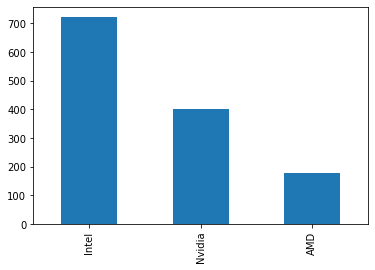

In [60]:
# Creating a bar plot to visualize the distribution of GPU brands based on the 'Gpu Brand Name' feature.
df['Gpu Brand Name'].value_counts().plot(kind='bar')

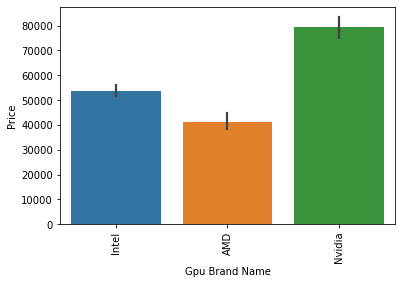

In [61]:
# Creating a bar plot to visualize the relationship between the GPU brand and the  price of laptops.
sns.barplot(x=df['Gpu Brand Name'],y =df['Price'],palette=sns.color_palette())
plt.xticks(rotation ='vertical')
plt.show()

In [62]:
# Dropping the 'Gpu' column from the DataFrame
# as it is no longer needed after extracting GPU brand information.
df.drop(columns=['Gpu'], axis=1, inplace=True)

In [63]:
#Counting the occurrences of each unique value in the 'OpSys' column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

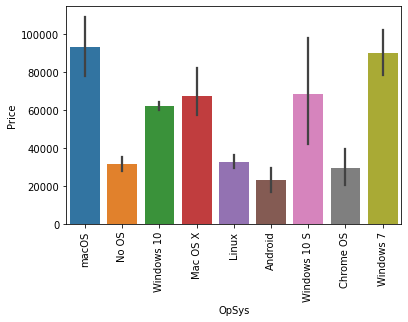

In [64]:
# Creating a bar plot to visualize the relationship between the operating system ('OpSys') and the  price of laptops.
sns.barplot(x= df['OpSys'] , y=df['Price'],palette=sns.color_palette())
plt.xticks(rotation ='vertical')
plt.show()


In [65]:
# Defining a function to categorize operating systems based on certain conditions.
def os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [66]:
# Applying the 'os' function to categorize operating systems
# and create a new feature 'os' based on the 'OpSys' column.
df['os'] = df['OpSys'].apply(lambda x: os(x))

In [67]:
# Dropping the 'OpSys' column from the DataFrame
# as it is no longer needed after creating the 'os' feature.
df.drop(columns=['OpSys'], axis=1, inplace=True)

In [68]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand Name,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


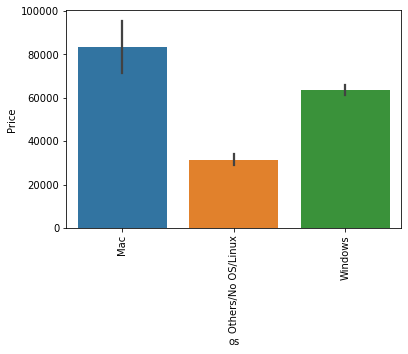

In [69]:
# Creating a bar plot to visualize the relationship between the categorized operating system ('os') and the  price of laptops.
sns.barplot(x=df['os'],y=df['Price'],palette=sns.color_palette())
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

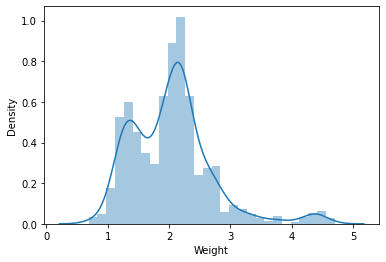

In [70]:
# Creating a distribution plot to visualize the distribution of laptop weights.
sns.distplot(df['Weight'])

#### It appears to be a bimodal distribution, indicating two peaks or modes in the data.


<AxesSubplot:xlabel='Weight', ylabel='Price'>

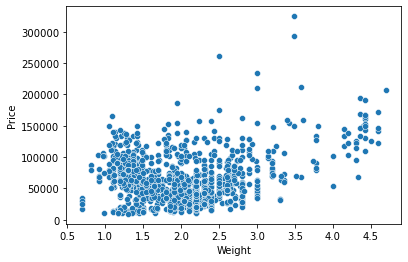

In [71]:
# Creating a scatter plot to explore the potential linear relationship between
# the price and weight of laptops.
sns.scatterplot(x=df["Weight"], y=df['Price'])

there is a  slite weak linear relationship between the price and the weight lets confirm this by the correlation 


In [72]:
# Calculating the correlation coefficients between the 'Price' column (target variable)
# and all other numerical features in the DataFrame to assess linear relationships.
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

As we can see the weight feature and the price feature has weak correrelation 

In [73]:
# Calculating the correlation matrix to measure the linear relationship
# between numerical features in the DataFrame.
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<AxesSubplot:>

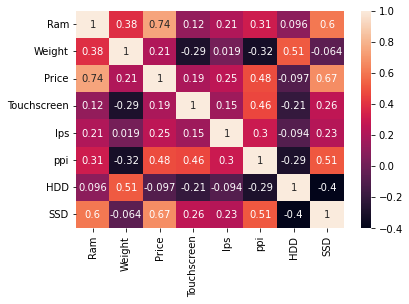

In [74]:
# Creating a heatmap to visualize the correlation matrix with annotated values.
sns.heatmap(df.corr(), annot=True)

As we can see there is not much multicolinearity between the independent features so we can good to go 

Now we have to transform the output feature because it is skewed it should be normal distribution because of the assumptions of the linear regression and also eventually our r2 score will also increases 

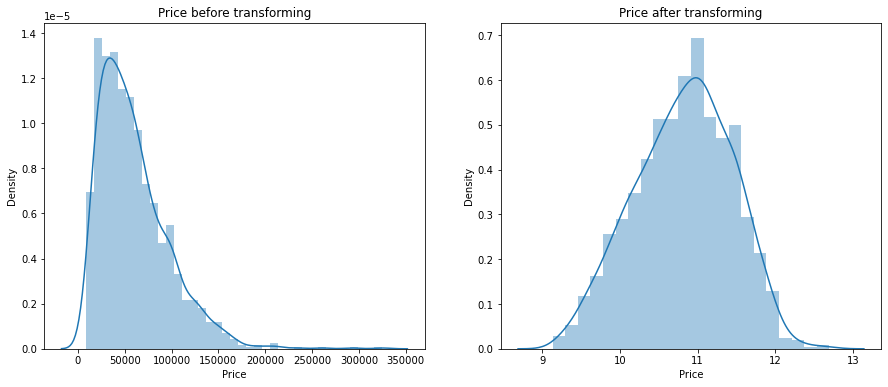

In [75]:
# Creating subplots to compare the distribution of prices before and after transformation.
plt.subplots(figsize=(15, 6))

# Subplot 1: Distribution plot of price before transformation
plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.title("Price before transforming")

# Subplot 2: Distribution plot of log-transformed price
plt.subplot(1, 2, 2)
sns.distplot(np.log(df['Price']))
plt.title("Price after transforming")

plt.show()


In [76]:
# Creating predictor variables (X) and target variable (y) for the model building.
x = df.drop(columns='Price')  # Features excluding 'Price'
y = np.log(df['Price'])  # Log-transformed price as the target variable

In [77]:
# Displaying the first few rows of predictor variables (features) for the model building.
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand Name,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [78]:
# Displaying the first few rows of target variable (Y) for the model building.
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [80]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Linear Regression 

In [81]:
columns_to_encode = [0,1,7,10,11]
 
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder="passthrough")

step2 = LinearRegression()

LinearRegression_pipe = Pipeline([("step1",step1),
                 ("step2",step2)])

LinearRegression_pipe.fit(x_train,y_train)
y_predict =LinearRegression_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.8074398922210776
MAE 0.21011299045976128


## Ridge Regression

In [82]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = Ridge(alpha=10)

Ridge_pipe = Pipeline([("step1",step1),
                 ("step2",step2)])

Ridge_pipe.fit(x_train,y_train)
y_predict =Ridge_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.8133986969425211
MAE 0.20834810869737602


## Lasso Regression

In [83]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = Lasso(alpha=0.001)

Lasso_pipe = Pipeline([("step1",step1),
                 ("step2",step2)])

Lasso_pipe.fit(x_train,y_train)
y_predict =Lasso_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.807878800810085
MAE 0.21042060597841247


## Decision Tree

In [118]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

DecisionTreeRegressor_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

DecisionTreeRegressor_pipe.fit(x_train,y_train)

y_pred = DecisionTreeRegressor_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8405511216179516
MAE 0.18611025966224612


## SVM

In [85]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

SVR_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

SVR_pipe.fit(x_train,y_train)

y_pred = SVR_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8040343468991403
MAE 0.20326283408856868


## Random Forest

In [86]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

RandomForestRegressor_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

RandomForestRegressor_pipe.fit(x_train,y_train)

y_pred = RandomForestRegressor_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8893698552057215
MAE 0.15819572898517945


## ADA Boost

In [87]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

ADA_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

ADA_pipe.fit(x_train,y_train)

y_pred = ADA_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.803467534162394
MAE 0.22453141829557405


## Gradient Boost

In [88]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

GradientBoostingRegressor_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

GradientBoostingRegressor_pipe.fit(x_train,y_train)

y_pred = GradientBoostingRegressor_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8765171323372948
MAE 0.15676220227994112


## XG Boost

In [89]:
step1 = ColumnTransformer(transformers=[
    ("onehot",OneHotEncoder(sparse = False),columns_to_encode)
],remainder = 'passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

XGBRegressor_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

XGBRegressor_pipe.fit(x_train,y_train)

y_pred = XGBRegressor_pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8617565806082935
MAE 0.16418715727827307


### Exporting the model as we can see the random forest algorith has the highest accuracy 


In [90]:
import pickle 
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(RandomForestRegressor_pipe,open("pipe.pkl","wb"))


In [91]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand Name,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
